In [ ]:
import io
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from google.colab import files
import warnings
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTENC
from sklearn.ensemble import StackingClassifier
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [ ]:
data_to_load = files.upload()

Saving dataset.xlsx to dataset.xlsx


In [ ]:
df = pd.read_excel(io.BytesIO(data_to_load['dataset.xlsx']))
data = df.copy()

In [ ]:
data.columns = [x.lower().strip().replace(' ','_') for x in data.columns]

In [ ]:
del(data['unnamed:_111'])

In [ ]:
data = data.rename(columns = {'partial_thromboplastin_time (ptt)':'partial_thromboplastin_time'})

In [ ]:
data.drop(columns=['patient_addmited_to_regular_ward_(1=yes,_0=no)',
                      'patient_addmited_to_semi-intensive_unit_(1=yes,_0=no)',
                      'patient_addmited_to_intensive_care_unit_(1=yes,_0=no)'], inplace=True)

In [ ]:
total_null_values = data.isnull().sum().sort_values(ascending=False) 
not_null_values = data.notnull().sum().sort_values(ascending=False) 
null_values_percentage = (data.isnull().sum()/data.notnull().count().sort_values(ascending=False)) * 100

dataset_missing_values = pd.concat({'Null': total_null_values, 'Not Null': not_null_values, 'Pourcentage': null_values_percentage}, axis=1)

dataset_missing_values

,Null,Not Null,Pourcentage
mycoplasma_pneumoniae,5644,0,100.000000
partial_thromboplastin_time,5644,0,100.000000
"prothrombin_time_(pt),_activity",5644,0,100.000000
d-dimer,5644,0,100.000000
urine_-_sugar,5644,0,100.000000
urine_-_nitrite,5643,1,99.982282
fio2_(venous_blood_gas_analysis),5643,1,99.982282
vitamin_b12,5641,3,99.946846
lipase_dosage,5636,8,99.858257
albumin,5631,13,99.769667


In [ ]:
dataset_missing_values[dataset_missing_values['Not Null'] <= 10]

,Null,Not Null,Pourcentage
mycoplasma_pneumoniae,5644,0,100.000000
partial_thromboplastin_time,5644,0,100.000000
"prothrombin_time_(pt),_activity",5644,0,100.000000
d-dimer,5644,0,100.000000
urine_-_sugar,5644,0,100.000000
urine_-_nitrite,5643,1,99.982282
fio2_(venous_blood_gas_analysis),5643,1,99.982282
vitamin_b12,5641,3,99.946846
lipase_dosage,5636,8,99.858257


In [ ]:
data.drop(columns=['d-dimer','partial_thromboplastin_time','mycoplasma_pneumoniae','prothrombin_time_(pt),_activity','urine_-_sugar','fio2_(venous_blood_gas_analysis)','urine_-_nitrite','vitamin_b12','lipase_dosage'], inplace=True)

In [ ]:
data = data.fillna(0)

In [ ]:
data.replace('not_detected', 0, inplace=True)
data.replace('detected', 1, inplace=True)
data.replace('absent', 0, inplace=True)
data.replace('present', 1, inplace=True)
data.replace('negative', 0, inplace=True)
data.replace('positive', 1, inplace=True)

In [ ]:
relevant_features = ["platelets","leukocytes","eosinophils","monocytes","hemoglobin","cto2_(arterial_blood_gas_analysis)","pco2_(arterial_blood_gas_analysis)","fever","sore_throat","cought","shortness_ofbreath","head_ache"]

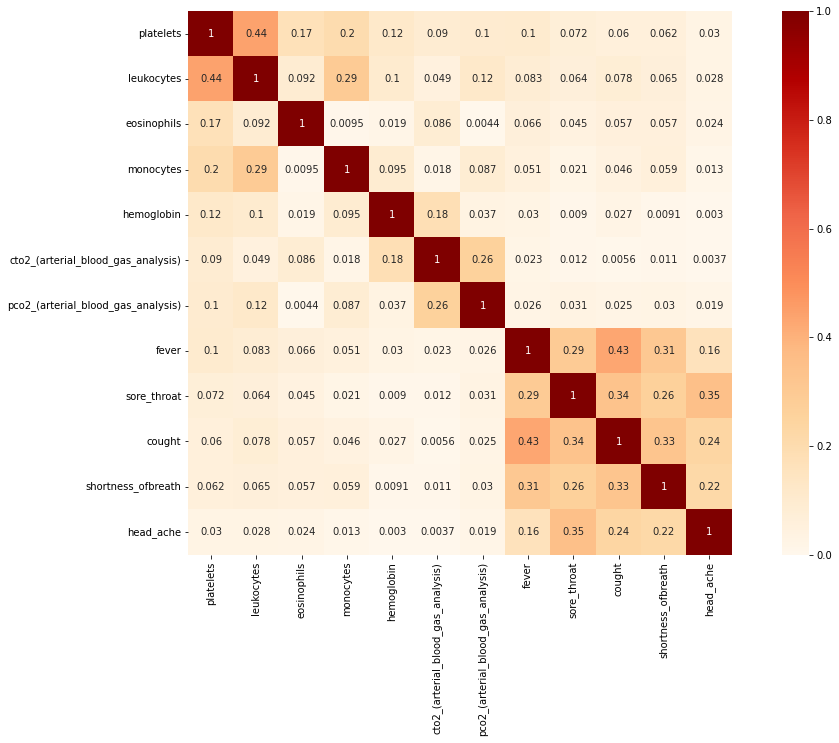

In [ ]:
fig, axs = plt.subplots(figsize=(18, 10))
sns.heatmap(abs(data[relevant_features].corr()), yticklabels=relevant_features, xticklabels=relevant_features, vmin = 0.0, square=True, annot=True, vmax=1.0, cmap='OrRd')

In [ ]:
target = data['sars-cov-2_exam_result']
features = data.select_dtypes(exclude=[object])
del(features['sars-cov-2_exam_result'])
X_train,X_test,y_train,y_test = train_test_split(features, target, test_size=0.3, random_state=42, stratify = target)

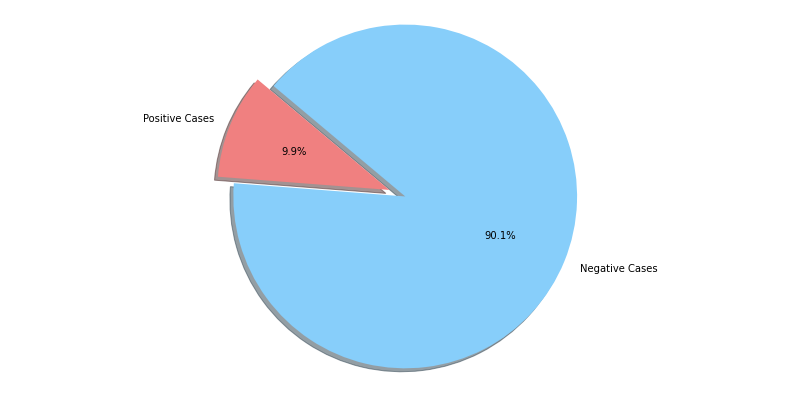

In [ ]:
dataset_negative = target == 0
dataset_positive = target == 1

labels = 'Positive Cases', 'Negative Cases'
sizes = [dataset_positive.sum(), dataset_negative.sum()]
colors = ['lightcoral', 'lightskyblue']
explode = (0.1, 0) 

fig, axs = plt.subplots(figsize=(14, 7))
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

In [ ]:
sm = SMOTENC(random_state=42,categorical_features=[16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,39,40,65,66])
X_res, y_res = sm.fit_resample(X_train, y_train)

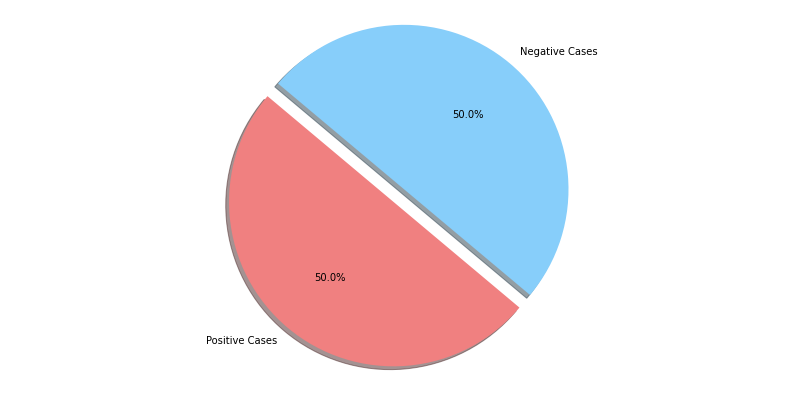

In [ ]:
dataset_negative = y_res == 0
dataset_positive = y_res == 1

labels = 'Positive Cases', 'Negative Cases'
sizes = [dataset_positive.sum(), dataset_negative.sum()]
colors = ['lightcoral', 'lightskyblue']
explode = (0.1, 0) 

fig, axs = plt.subplots(figsize=(14, 7))
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

In [ ]:
#Standardisation des données
from sklearn.preprocessing import StandardScaler

scaler= StandardScaler() 
scaler.fit(X_res)      
X_scaled = pd.DataFrame(scaler.transform(X_res), columns = X_train.columns ) # transform train set

test_scaled = pd.DataFrame(scaler.transform(X_test), columns = X_train.columns )

In [ ]:
#application du pca
from sklearn.decomposition import PCA
pca_ = PCA()
train_pca = pca_.fit_transform(X_scaled)
df_PCA = pd.DataFrame(train_pca, index = X_res.index, columns = ['PC'+str(i) for i in range(pca_.n_components_)])

In [ ]:
#les variances expliquées 
pca_.explained_variance_

array([5.06531315e+00, 4.49104180e+00, 4.24382261e+00, 3.96721286e+00,
       3.24595010e+00, 2.95799101e+00, 2.49322091e+00, 2.45871548e+00,
       2.24645449e+00, 2.16672147e+00, 1.98769069e+00, 1.78346928e+00,
       1.67037701e+00, 1.56825885e+00, 1.51667094e+00, 1.41892044e+00,
       1.37549179e+00, 1.31367877e+00, 1.26288280e+00, 1.21796575e+00,
       1.20697703e+00, 1.19682051e+00, 1.12881356e+00, 1.09021395e+00,
       1.07045262e+00, 1.05684044e+00, 1.03606064e+00, 1.01561256e+00,
       1.00940076e+00, 1.00470568e+00, 1.00091802e+00, 9.96216629e-01,
       9.95614450e-01, 9.81535835e-01, 9.38418857e-01, 9.14979543e-01,
       9.11409709e-01, 8.86359279e-01, 8.78547641e-01, 8.71024740e-01,
       8.55033750e-01, 8.29415674e-01, 8.19544087e-01, 8.12761076e-01,
       7.89965030e-01, 7.64277378e-01, 7.31171254e-01, 7.17750032e-01,
       7.12986244e-01, 7.03398583e-01, 6.68945289e-01, 6.47464430e-01,
       6.30489433e-01, 6.07996702e-01, 5.54658116e-01, 5.15652468e-01,
      

In [ ]:
#composition d'un dataset contenant les composants pca avec leur variance expliquées
list_pca = ['PC '+str(i) for i in range(pca_.n_components_)]
df_pca = pd.DataFrame(list_pca, columns = ["Principal_Component"])
df_pca['Variance_expliquée'] = pca_.explained_variance_
df_pca

,Principal_Component,Variance_expliquée
0,PC 0,5.065313e+00
1,PC 1,4.491042e+00
2,PC 2,4.243823e+00
3,PC 3,3.967213e+00
4,PC 4,3.245950e+00
5,PC 5,2.957991e+00
6,PC 6,2.493221e+00
7,PC 7,2.458715e+00
8,PC 8,2.246454e+00
9,PC 9,2.166721e+00


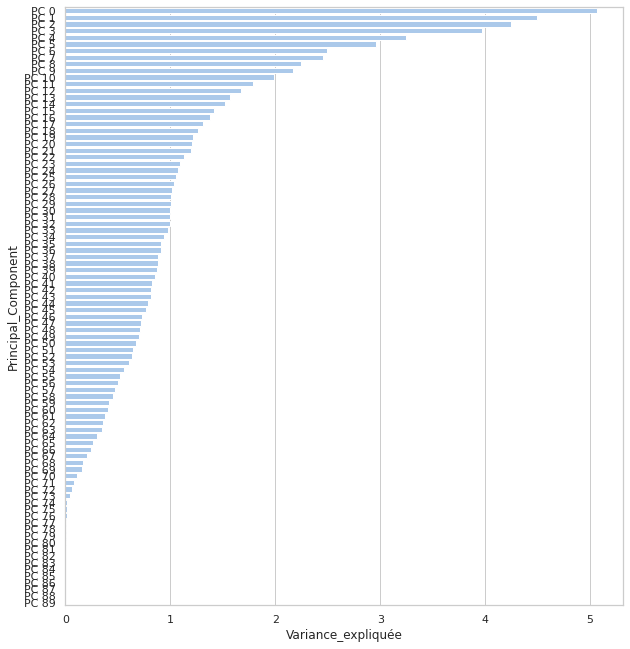

In [ ]:
#Affichage du pourcentage de la variance expliquée par composante 
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

f, ax = plt.subplots(figsize=(10, 11))

sns.set_color_codes("pastel")
sns.barplot(x="Variance_expliquée", y="Principal_Component", data=df_pca,
            label="Total", color="b")

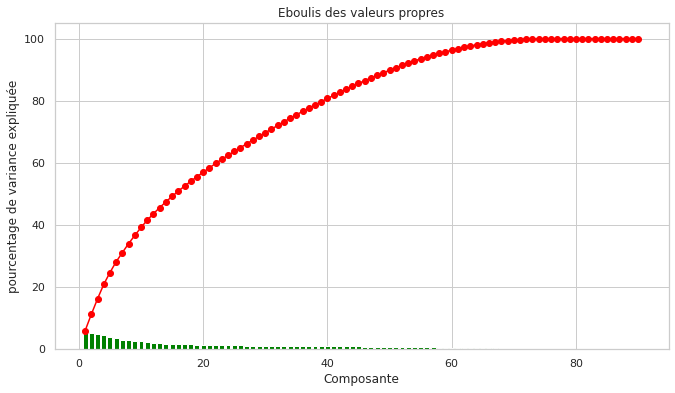

In [ ]:
#fonction qui calcul le nombre de composantes pour un pourcentage d'information
scree = pca_.explained_variance_ratio_*100
plt.figure(figsize = (11,6))
plt.bar(np.arange(len(scree))+1, scree,  color = 'green')
plt.plot(np.arange(len(scree))+1, scree.cumsum(),c="red",marker='o')
plt.xlabel("Composante")
plt.ylabel("pourcentage de variance expliquée")
plt.title("Eboulis des valeurs propres")
plt.show(block=False)

In [ ]:
from sklearn.decomposition import PCA,TruncatedSVD

def _get_number_components(model, threshold):
    component_variance = model.explained_variance_ratio_
    explained_variance = 0.0
    components = 0

    for var in component_variance:
        explained_variance += var
        components += 1
        if(explained_variance >= threshold):
            break
    return components

In [ ]:
#calcul du nombre des composants équivalent à 80% de l'information
pca_ = PCA()
train_pca = pca_.fit_transform(X_scaled)

components = _get_number_components(pca_, threshold=0.8)
components

40

In [ ]:
#Composition d'un dataset à partir des nouvelles compossantes
obj_pca = model = PCA(n_components = components)
train_pca = obj_pca.fit_transform(X_scaled)
df_train_pca = pd.DataFrame(train_pca) 
test_pca = obj_pca.transform(test_scaled)
df_test_pca = pd.DataFrame(test_pca, index = X_test.index)

In [ ]:
clf = LogisticRegression()
grid_values = {'penalty': ['l1', 'l2'],'C':[0.001,.009,0.01,.09,1,5,10,25]}
grid_clf_acc = GridSearchCV(clf, param_grid = grid_values,scoring = 'recall')
grid_clf_acc.fit(df_train_pca, y_res)
print(grid_clf_acc.best_params_)

{'C': 0.001, 'penalty': 'l2'}


In [ ]:
logreg = LogisticRegression(C = 0.001, penalty = 'l2')
logreg.fit(df_train_pca,y_res)

y_logreg=logreg.predict(df_test_pca)
score_Logreg = logreg.score(df_test_pca, y_test)
score_Logreg


0.9498229043683589

In [ ]:
cr_Logreg =classification_report(y_test, y_logreg) 
print(cr_Logreg)

              precision    recall  f1-score   support

           0       0.99      0.95      0.97      1527
           1       0.68      0.92      0.78       167

    accuracy                           0.95      1694
   macro avg       0.84      0.93      0.88      1694
weighted avg       0.96      0.95      0.95      1694



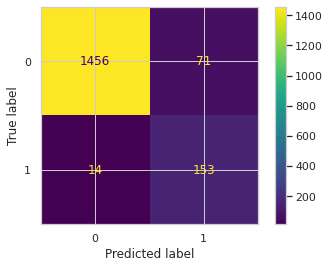

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(logreg, df_test_pca, y_test)  
plt.show()

In [ ]:
param_grid = {'C': [0.1, 10, 100, 1000],
              'gamma': [ 0.1, 0.001, 0.0001],
              'kernel': ['rbf','linear']}
grid = GridSearchCV(svm.SVC(), param_grid, refit = True, verbose = 3)
grid.fit(df_train_pca, y_res)
print(grid.best_params_)


Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.874 total time=   1.2s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.869 total time=   1.1s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.856 total time=   1.1s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.846 total time=   1.1s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.866 total time=   1.1s
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.928 total time=   0.8s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.923 total time=   1.4s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.911 total time=   1.5s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.924 total time=   2.2s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.925 total time=   1.4s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.869 total time=   0.9s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf

In [ ]:
clf = svm.SVC(kernel='rbf', C=1, gamma= 0.01)
clf.fit(df_train_pca, y_res)
y_svm = clf.predict(df_test_pca)
score_Svm = clf.score(df_test_pca, y_test)
score_Svm

0.9462809917355371

In [ ]:
cr_Svm = classification_report(y_test, y_svm)
print(cr_Svm)

              precision    recall  f1-score   support

           0       0.98      0.96      0.97      1527
           1       0.69      0.82      0.75       167

    accuracy                           0.95      1694
   macro avg       0.84      0.89      0.86      1694
weighted avg       0.95      0.95      0.95      1694



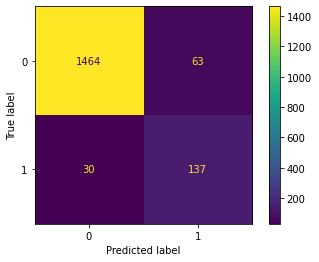

In [ ]:
plot_confusion_matrix(clf, df_test_pca, y_test)  
plt.show()

In [ ]:
params = {'activation': ['relu', 'tanh', 'logistic', 'identity'],
          'hidden_layer_sizes': [(100,), (50,100,), (50,75,100,)],
          'solver': ['adam', 'sgd', 'lbfgs'],
          'learning_rate' : ['constant', 'adaptive', 'invscaling']
         }
mlp_classif_grid = GridSearchCV(MLPClassifier(random_state=123), param_grid=params, n_jobs=-1, cv=5, verbose=5)
mlp_classif_grid.fit(df_train_pca,y_res)
print(mlp_classif_grid.best_params_)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
{'activation': 'relu', 'hidden_layer_sizes': (50, 100), 'learning_rate': 'constant', 'solver': 'adam'}


In [ ]:
classifier = MLPClassifier(hidden_layer_sizes=(50,100),activation = 'relu',random_state=123,learning_rate='constant',solver='adam')
classifier.fit(df_train_pca,y_res)
y_Mlp=classifier.predict(df_test_pca)
score_Mlp=classifier.score(df_test_pca,y_test)
score_Mlp

0.9492325855962219

In [ ]:
cr_Mlp = classification_report(y_test, y_Mlp)
print(cr_Mlp)

              precision    recall  f1-score   support

           0       0.98      0.96      0.97      1527
           1       0.70      0.84      0.77       167

    accuracy                           0.95      1694
   macro avg       0.84      0.90      0.87      1694
weighted avg       0.95      0.95      0.95      1694



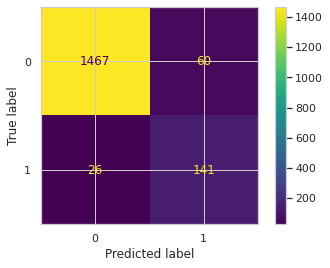

In [ ]:
plot_confusion_matrix(classifier, df_test_pca, y_test)  
plt.show()

In [ ]:
param_grid = {'n_neighbors' : np.arange(1,50)}
knn =  KNeighborsClassifier()
knn_cv = GridSearchCV(knn, param_grid, cv=5)
knn_cv.fit(df_train_pca,y_res)
print("The best paramter we have is: {}" .format(knn_cv.best_params_))

The best paramter we have is: {'n_neighbors': 6}


In [ ]:
KNN = KNeighborsClassifier(n_neighbors=6)
KNN.fit(df_train_pca,y_res)
y_Knn = KNN.predict(df_test_pca)
score_Knn = KNN.score(df_test_pca, y_test)
score_Knn

0.9403778040141676

In [ ]:
cr_Knn = classification_report(y_test, y_Knn)
print(cr_Knn)

              precision    recall  f1-score   support

           0       0.98      0.95      0.97      1527
           1       0.66      0.81      0.73       167

    accuracy                           0.94      1694
   macro avg       0.82      0.88      0.85      1694
weighted avg       0.95      0.94      0.94      1694



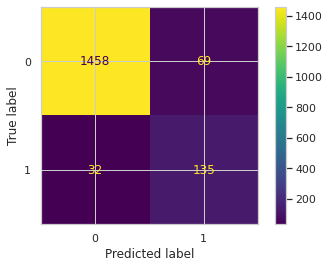

In [ ]:
plot_confusion_matrix(KNN, df_test_pca, y_test)  
plt.show()

In [ ]:
model_rf = RandomForestClassifier(n_estimators= 1000, max_depth=150)
model_rf.fit(df_train_pca,y_res)
score_rf = model_rf.score(df_test_pca,y_test)
y_pred_rf = model_rf.predict(df_test_pca)
print(score_rf)
print(classification_report(y_test, y_pred_rf))

0.9474616292798111
              precision    recall  f1-score   support

           0       0.98      0.97      0.97      1527
           1       0.71      0.78      0.74       167

    accuracy                           0.95      1694
   macro avg       0.84      0.87      0.86      1694
weighted avg       0.95      0.95      0.95      1694



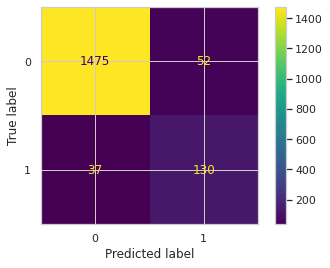

In [ ]:
plot_confusion_matrix(model_rf, df_test_pca, y_test)  
plt.show()

In [ ]:
model_GBC = GradientBoostingClassifier(n_estimators= 100)
model_GBC.fit(df_train_pca,y_res)
y_prd_g = model_GBC.predict(df_test_pca)
score_Gbc = model_GBC.score(df_test_pca,y_test)
print(score_Gbc)
print(classification_report(y_test, y_prd_g))

0.9451003541912633
              precision    recall  f1-score   support

           0       0.98      0.96      0.97      1527
           1       0.68      0.85      0.75       167

    accuracy                           0.95      1694
   macro avg       0.83      0.90      0.86      1694
weighted avg       0.95      0.95      0.95      1694



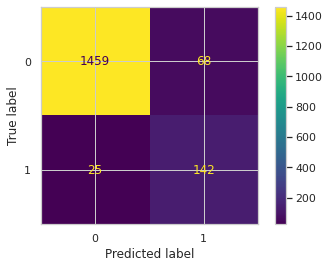

In [ ]:
plot_confusion_matrix(model_GBC, df_test_pca, y_test)  
plt.show()

In [ ]:
model_Sc = StackingClassifier([('gradientbc',model_GBC),('SVM',logreg),('mlp',classifier)],final_estimator=AdaBoostClassifier())
model_Sc.fit(df_train_pca,y_res)
score_Sc = model_Sc.score(df_test_pca,y_test)
y_prrd = model_Sc.predict(df_test_pca)
print(classification_report(y_test, y_prrd))

              precision    recall  f1-score   support

           0       0.99      0.96      0.97      1527
           1       0.71      0.87      0.78       167

    accuracy                           0.95      1694
   macro avg       0.85      0.91      0.88      1694
weighted avg       0.96      0.95      0.95      1694



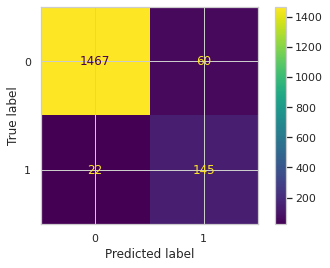

In [ ]:
plot_confusion_matrix(model_Sc, df_test_pca, y_test)  
plt.show()